In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

[27.488]


ZeroDivisionError: float division by zero

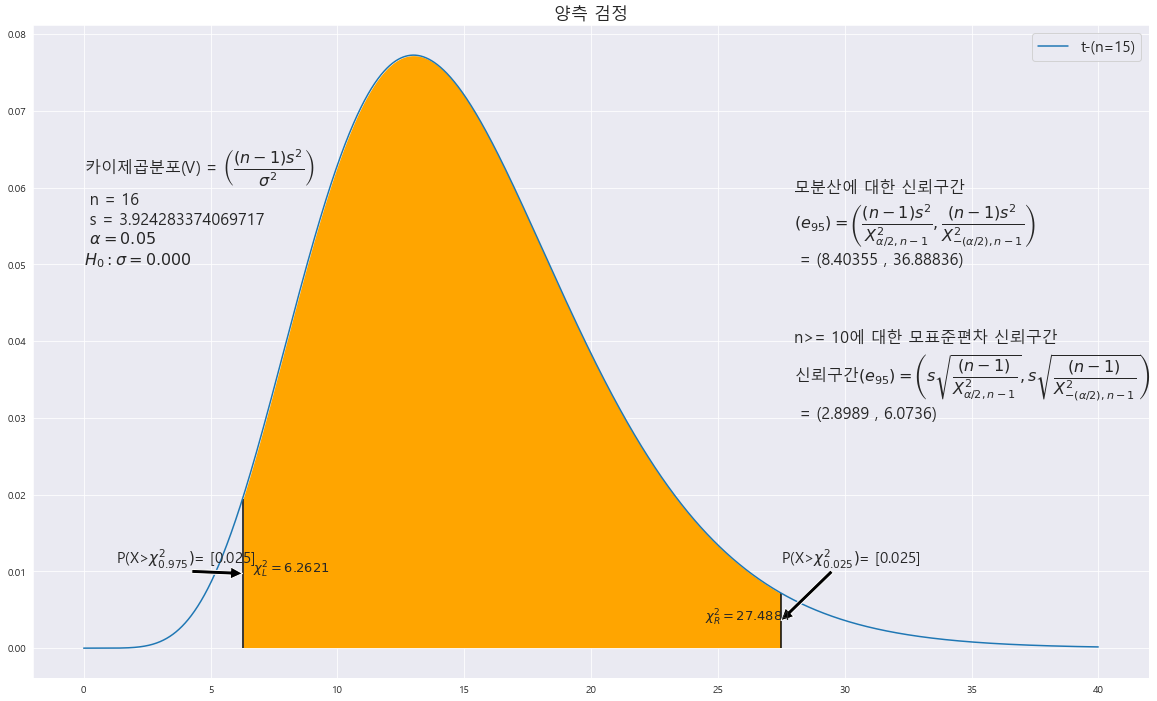

In [6]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
Vars = 15.4
n = 16
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = 0


ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(X_R_1)
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)

1.4142135623730951
X_r : [27.204]
X_l : [11.651]
X_R_1 : 22.799999999999997


Text(16.4, [0.028], 'P-value : \n P(V>=22.8) \n = 0.2463')

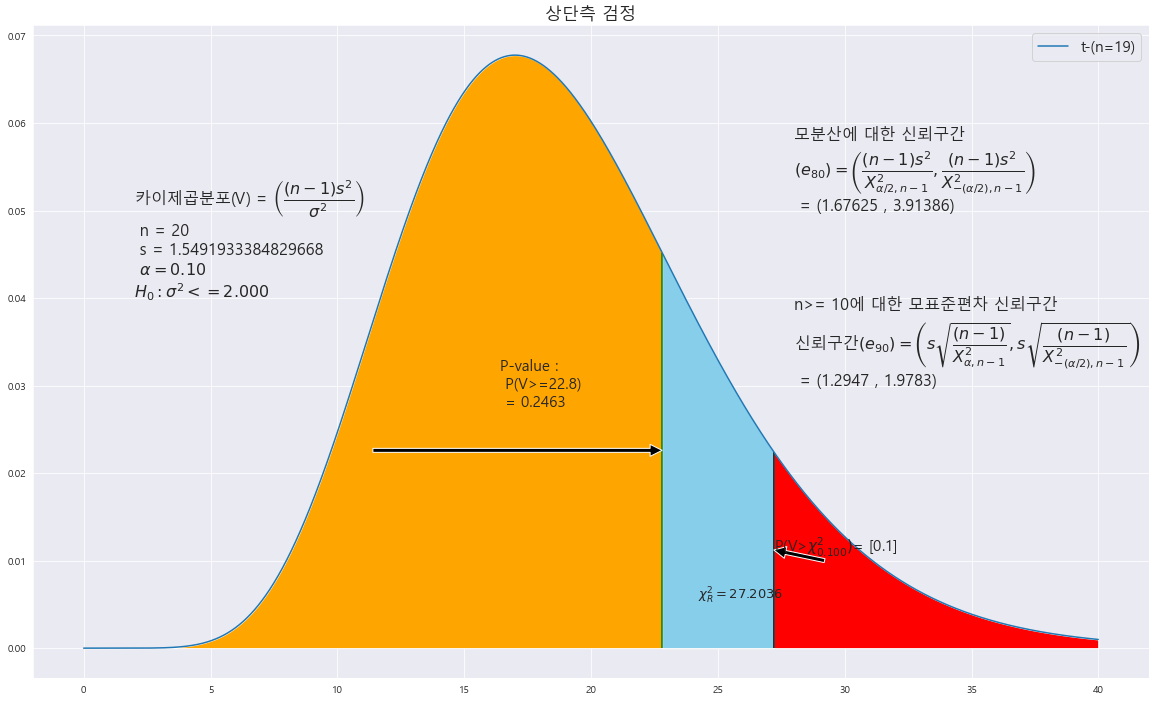

In [20]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

Vars = 2.4
# Vars = 0.2**2
n = 20
dof_2 = [n-1] #자유도

trust = 90
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = math.sqrt(2)
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
# ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(V>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
# ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28, 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(2 , 0.04 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma^2 <= {%.3f}$' % (MO_std**2) , fontsize = 16)


# ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/4 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('상단측 검정' , fontsize = 17)

X_R_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_R_1 : {X_R_1}' )
X_R_1 = abs(round(X_R_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float( 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1)/2 + 5, annotate_len+0.005 , f'P-value : \n P(V>={X_R_1}) \n = {area}',fontsize=15)

In [30]:
A = '938.8 952.0 946.8 958.8 948.4 950.0 953.8 928.8 947.5 936.2'
A = list(map(float, A.split(' ')))

MEANS = np.mean(A)
VARS = np.var(A , ddof=1)

print(A)
print(MEANS)
print(VARS)


sum= 0
for i in A:
    sum += (i - MEANS)**2

print(sum/9)

[938.8, 952.0, 946.8, 958.8, 948.4, 950.0, 953.8, 928.8, 947.5, 936.2]
946.11
80.99211111111103
80.99211111111104


[2.262]
[-2.262]
-1.3669


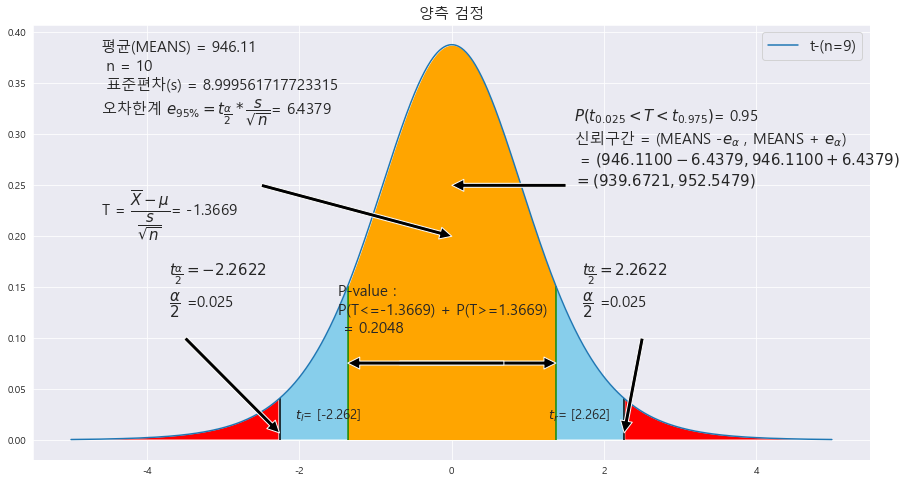

In [23]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


# MEANS = np.mean(A.loc['실험 전 - 실험 후'])
STDS = math.sqrt(VARS)
MO_MEAN = 950



n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)


ax.set_title('양측 검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[19.023]
X_L_1 : 0.17219387755102042
47.7277


Text(28.77775, [0.005], 'P-value : \nP(X<=0.1722) + P(X>=47.7277) \n = 0.0')

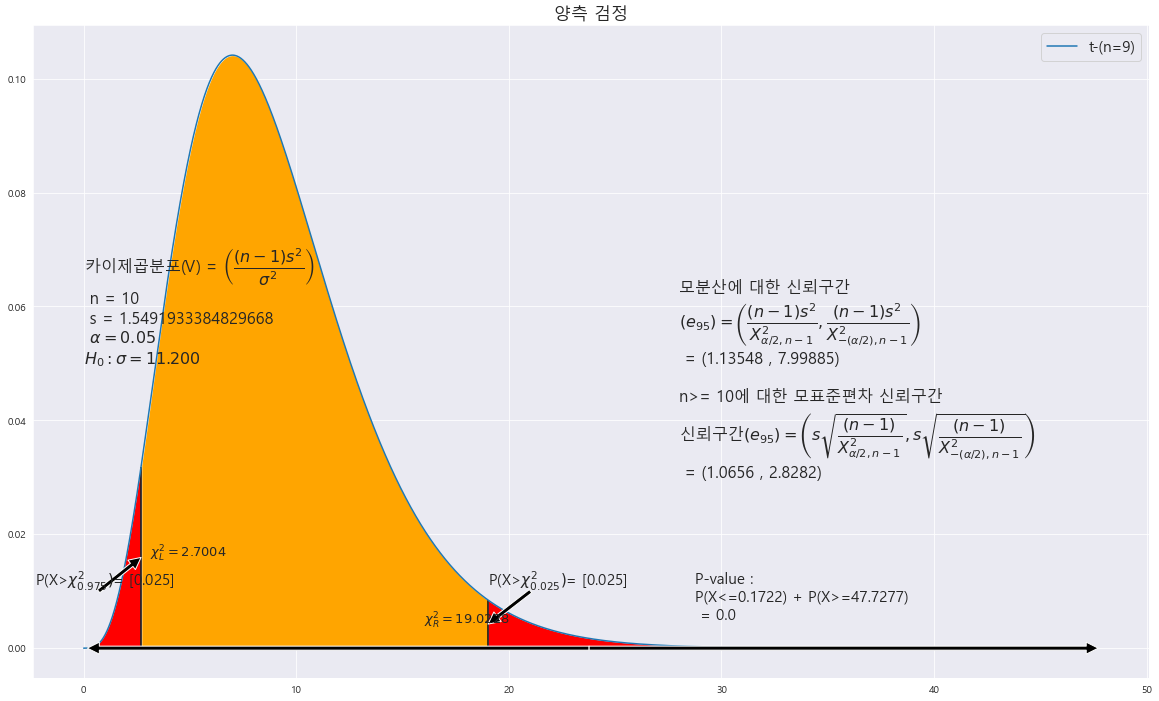

In [24]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 15.4
n = len(A)
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = 11.2


ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(VX>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(X_R_1)
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(V<={X_L_1}) + P(V>={X_R_1}) \n = {area}',fontsize=15)

125.43999999999998
[19.023]
X_L_1 : 5.9685
11.2811


Text(7.6563, [0.038], 'P-value : \nP(V<=5.9685) + P(V>=11.2811) \n = 0.5139')

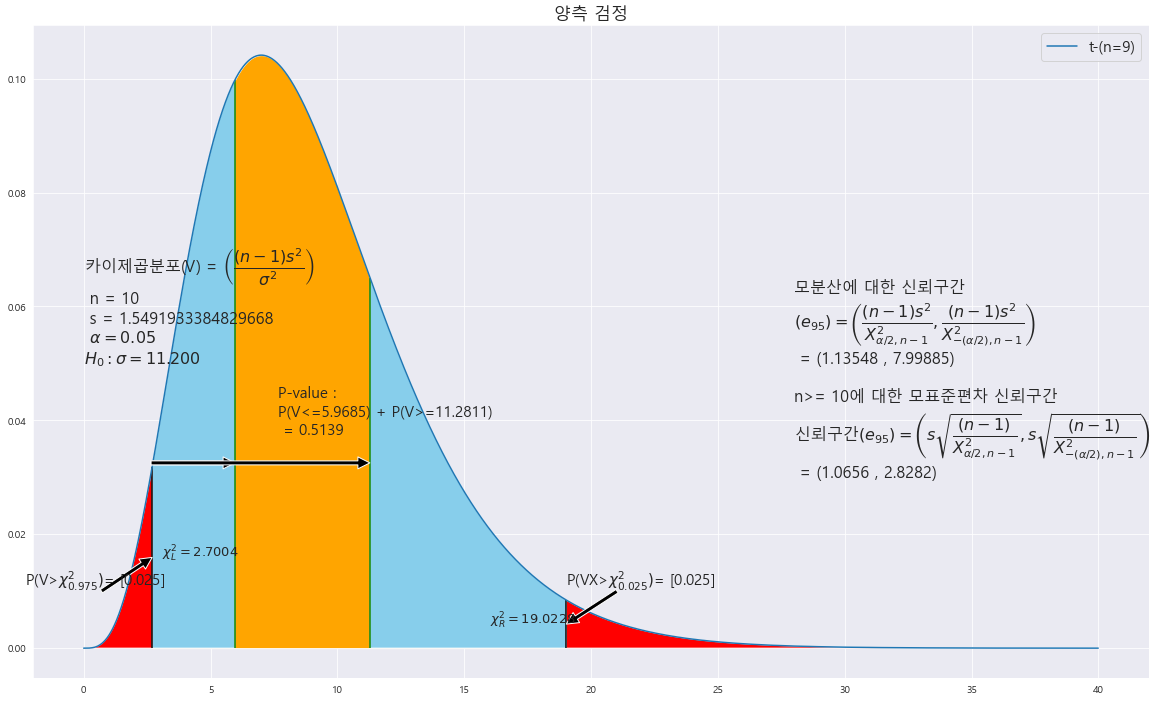

In [41]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 15.4

VARS = 157.234
n = len(A)
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = 11.2
print(MO_std**2)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(VX>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)


X_L_1 = (n-1) * VARS / (MO_std**2) #검정값
if scipy.stats.chi2(dof_2).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)

# print(VARS)
# print(9*VARS / MO_std**2)
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(X_R_1)
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(V<={X_L_1}) + P(V>={X_R_1}) \n = {area}',fontsize=15)

In [42]:
A = "20.8 20.2 19.2 21.1 20.6 20.0 20.3 19.5 19.7 20.3"
A = list(map(float , A.split(' ')))


[1.833]
[-1.833]
0.9129


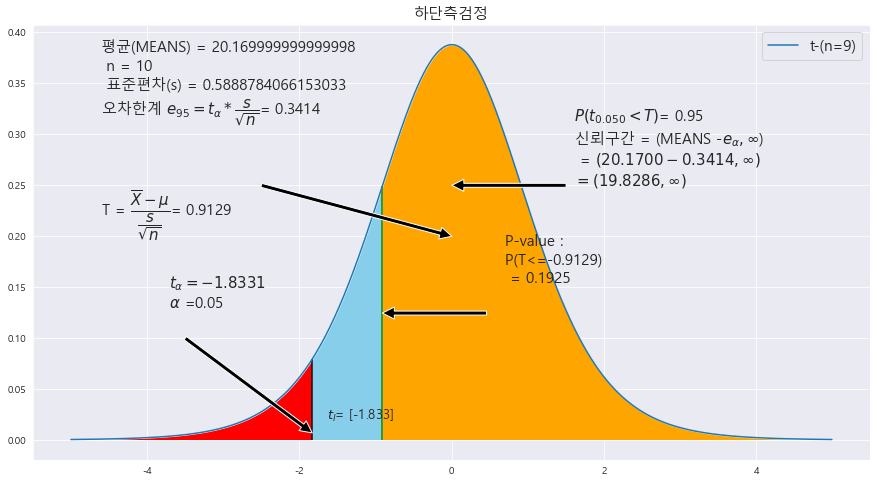

In [43]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = np.mean(A)
STDS = np.std(A, ddof=1)
MO_MEAN = 20



#n = len(A) #표본개수



n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha} , \infty$)' +f'\n' + r' = $({%.4f} - {%.4f} , \infty)$' % (MEANS, E)  +f'\n' +r'$ = ({%.4f} , \infty)$' % (MEANS-E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [47]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

A = "20.8 20.2 19.2 21.1 20.6 20.0 20.3 19.5 19.7 20.3"
A = list(map(float , A.split(' ')))

Vars = np.var(A , ddof=1)
# Vars =
n = len(A)
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = 0.5
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




# X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
# print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X>=X_l) , facecolor = 'orange')



# ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
# plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .02)  , arrowprops = dict(facecolor = 'black'))
area = scipy.stats.chi2(dof_2).cdf(X_l)
# ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .021, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(16 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
# ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('하단측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1)),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len/2), xytext=((X_L_1)*2 , annotate_len/2)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_L_1)*2 , annotate_len/2 , f'P-value : \nP(V<={X_L_1})) \n = {area}',fontsize=15)X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 15.4

VARS = 157.234
n = len(A)
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = 11.2
print(MO_std**2)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(VX>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)


X_L_1 = (n-1) * VARS / (MO_std**2) #검정값
if scipy.stats.chi2(dof_2).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)

# print(VARS)
# print(9*VARS / MO_std**2)
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(X_R_1)
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(V<={X_L_1}) + P(V>={X_R_1}) \n = {area}',fontsize=15)

SyntaxError: invalid syntax (<ipython-input-47-d0fd5ad0c7af>, line 88)

[21.92]
X_L_1 : 6.1917
16.0379


Text(9.9231, [0.023], 'P-value : \nP(V<=6.1917) + P(V>=16.0379) \n = 0.2795')

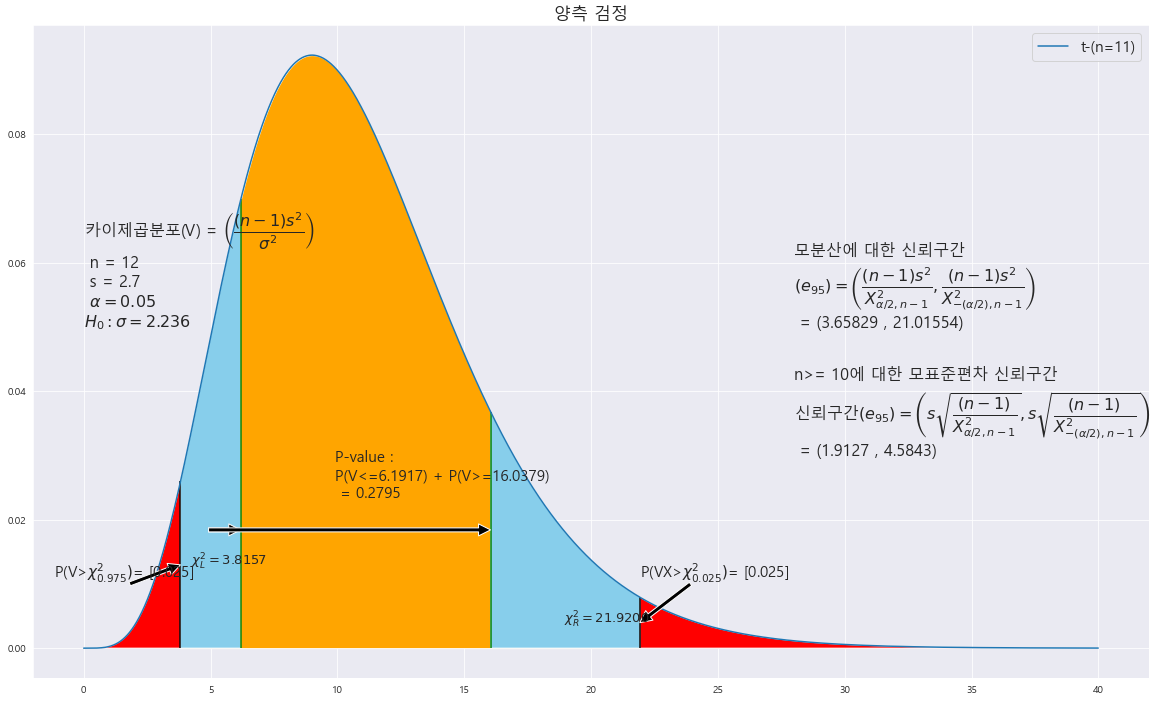

In [57]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 15.4

VARS = 2.7**2
n = 12
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = math.sqrt(5)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(VX>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)


X_L_1 = (n-1) * VARS / (MO_std**2) #검정값
if scipy.stats.chi2(dof_2).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)

# print(VARS)
# print(9*VARS / MO_std**2)
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(X_R_1)
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(V<={X_L_1}) + P(V>={X_R_1}) \n = {area}',fontsize=15)

2.23606797749979
X_r : [19.675]
X_l : [4.575]
X_R_1 : 16.038


Text(13.019, [0.023], 'P-value : \n P(V>=16.038) \n = 0.1397')

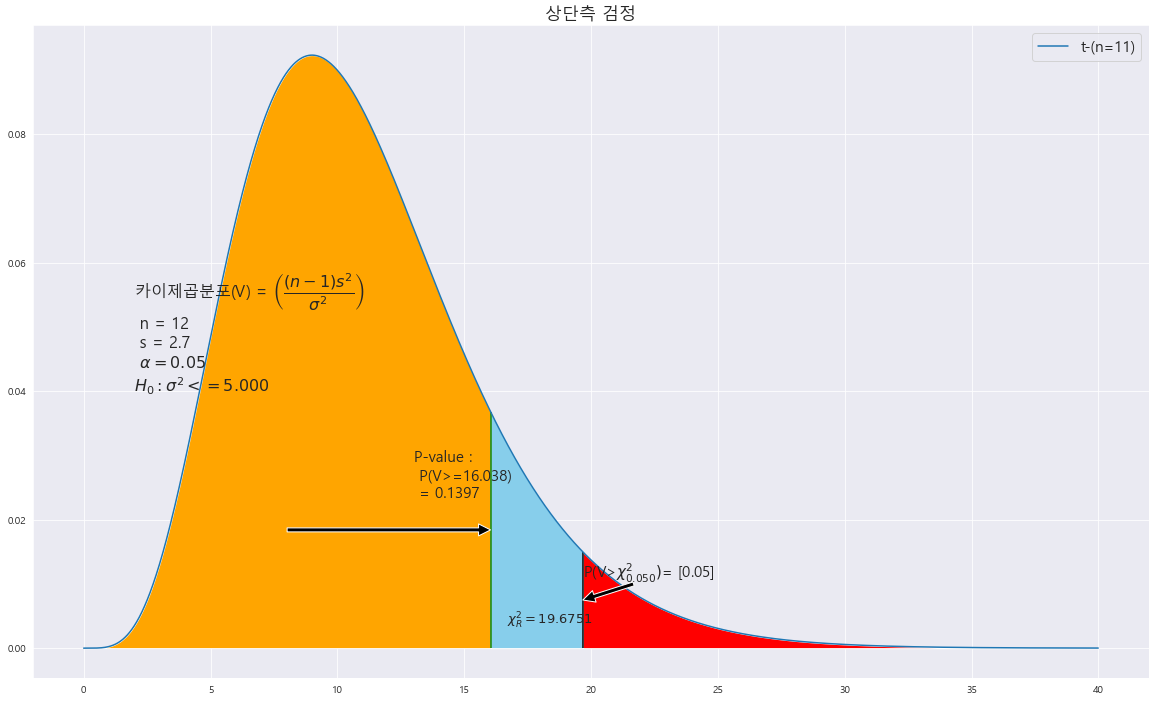

In [59]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

Vars = 2.7**2
# Vars = 0.2**2
n = 12
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = math.sqrt(5)
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
# ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(V>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
# ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


# ax.text(28, 0.05 , f'모분산에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
# ax.text(28 , 0.03 ,f'n>= 10에 대한 모표준편차 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(2 , 0.04 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma^2 <= {%.3f}$' % (MO_std**2) , fontsize = 16)


# ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/4 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('상단측 검정' , fontsize = 17)

X_R_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_R_1 : {X_R_1}' )
X_R_1 = abs(round(X_R_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float( 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1)/2 + 5, annotate_len+0.005 , f'P-value : \n P(V>={X_R_1}) \n = {area}',fontsize=15)